In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("train.csv")
display(df.head(2))
print(df.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


(1460, 81)


# Preprocessing

### 1. Data Understanding

In [5]:
df.drop(["Id"], axis=1, inplace=True)

### 2. Check for Dtypes

In [6]:
pd.DataFrame({"Dtypes": df.dtypes, "Num_Uniq": df.nunique()}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Dtypes,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object,int64
Num_Uniq,15,5,110,1073,2,2,4,4,2,5,3,25,9,8,5,8,10,9,112,61,6,8,15,16,4,327,4,5,6,4,4,4,6,637,6,144,780,721,6,5,2,5,753,417,24,861,4,3,4,3,8,4,4,12,7,4,5,6,97,3,5,441,5,5,3,274,202,120,20,76,8,3,4,4,21,12,5,9,6,663


In [7]:
cols_to_change = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
df[cols_to_change] = df[cols_to_change].astype("category")
pd.DataFrame({"Dtypes": df.dtypes, "Num_Uniq": df.nunique()}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Dtypes,category,category,float64,int64,category,category,category,category,category,category,category,category,category,category,category,category,category,category,int64,int64,category,category,category,category,category,float64,category,category,category,category,category,category,category,int64,category,int64,int64,int64,category,category,category,category,int64,int64,int64,int64,category,category,category,category,category,category,category,int64,category,category,category,category,float64,category,category,int64,category,category,category,int64,int64,int64,int64,int64,category,category,category,category,int64,category,category,category,category,int64
Num_Uniq,15,5,110,1073,2,2,4,4,2,5,3,25,9,8,5,8,10,9,112,61,6,8,15,16,4,327,4,5,6,4,4,4,6,637,6,144,780,721,6,5,2,5,753,417,24,861,4,3,4,3,8,4,4,12,7,4,5,6,97,3,5,441,5,5,3,274,202,120,20,76,8,3,4,4,21,12,5,9,6,663


### 3. Null values

**Check for Null Values**

In [8]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "Null_ratio": null_ratio}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Null,0.0,0.0,259.000000,0.0,0.0,1369.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,8.000000,0.0,0.0,0.0,37.000000,37.000000,38.000000,37.000000,0.0,38.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,690.000000,81.000000,81.000000,81.000000,0.0,0.0,81.000000,81.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1453.000000,1179.000000,1406.000000,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.177397,0.0,0.0,0.937671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005479,0.005479,0.0,0.0,0.0,0.025342,0.025342,0.026027,0.025342,0.0,0.026027,0.0,0.0,0.0,0.0,0.0,0.0,0.000685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.472603,0.055479,0.055479,0.055479,0.0,0.0,0.055479,0.055479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995205,0.807534,0.963014,0.0,0.0,0.0,0.0,0.0,0.0


**Drop Null values**

In [9]:
c1 = "MasVnrType MasVnrArea Electrical".split()
df.dropna(subset=c1, inplace=True)

**Replace Null values**

- Replace with Mode for categorical columns

In [10]:
# c2 = "LotFrontage BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 GarageType GarageYrBlt GarageFinish GarageQual GarageCond".split()
c2 = "BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 GarageType GarageFinish GarageQual GarageCond".split()
modes = dict(df[c2].mode().iloc[0])
# modes

In [11]:
df.fillna(modes, inplace=True)

- Replace with Median for numerical columns(due to distribution skewness)

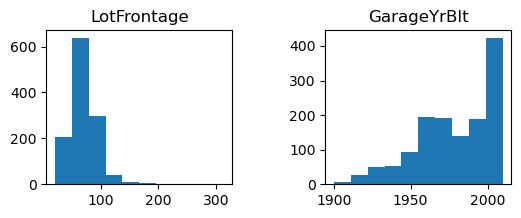

In [12]:
plt.figure(figsize=(6, 2))

plt.subplot(1, 2, 1)
plt.title("LotFrontage")
plt.hist(df["LotFrontage"])

plt.subplot(1, 2, 2)
plt.title("GarageYrBlt")
plt.hist(df["GarageYrBlt"])

plt.subplots_adjust(wspace=.5)
plt.show()

In [13]:
c2 = ["LotFrontage", "GarageYrBlt"]
medians = dict(df[c2].median())
medians

{'LotFrontage': 69.0, 'GarageYrBlt': 1979.5}

In [14]:
df.fillna(medians, inplace=True)

**Drop columns with high Null Ratio**

In [15]:
c3 = "Alley FireplaceQu PoolQC Fence MiscFeature".split()
df.drop(c3, axis=1, inplace=True)

**Check for Null Values after handing Null values**

In [16]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "Null_ratio": null_ratio}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4. Visualization

In [17]:
num_cols = df.select_dtypes("number").columns.tolist()
cat_cols = df.select_dtypes("category").columns.tolist()

In [18]:
print(len(num_cols))
print(len(cat_cols))

23
52


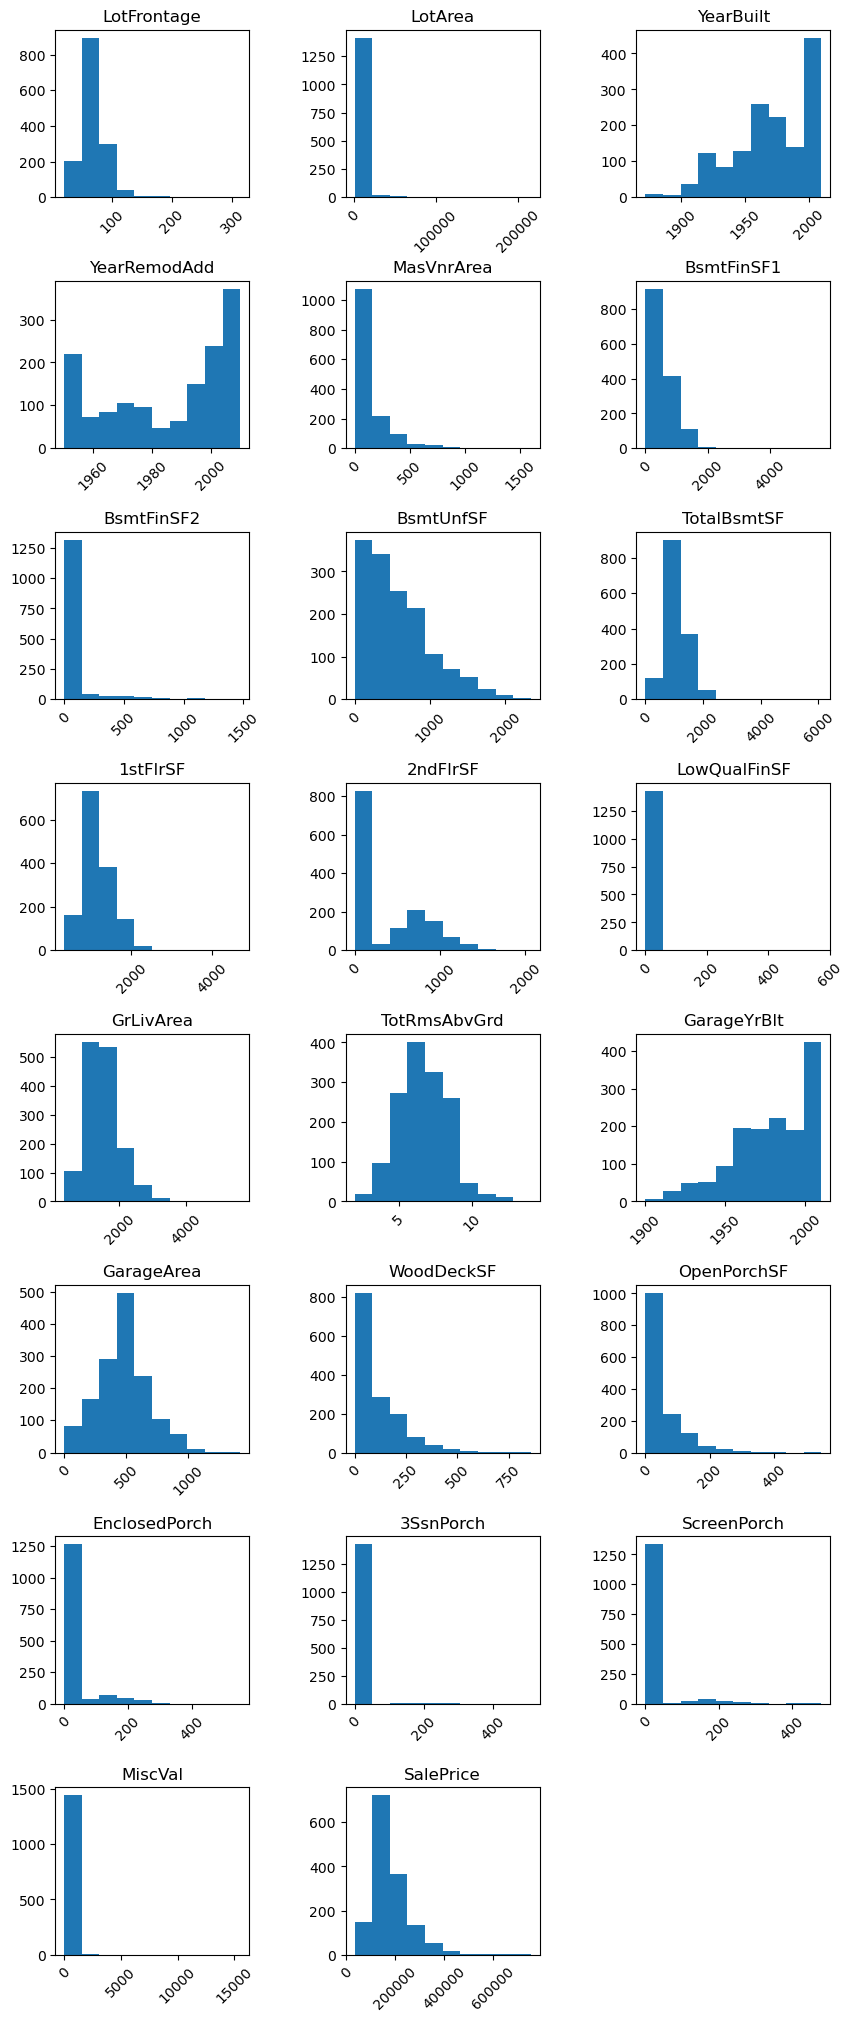

In [19]:
plt.figure(figsize=(10, 25))
for i, col in enumerate(num_cols):
    plt.subplot(8, 3, i+1)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.hist(df[col])
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

In [20]:
num_low_var_cols = ['LotArea', 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']

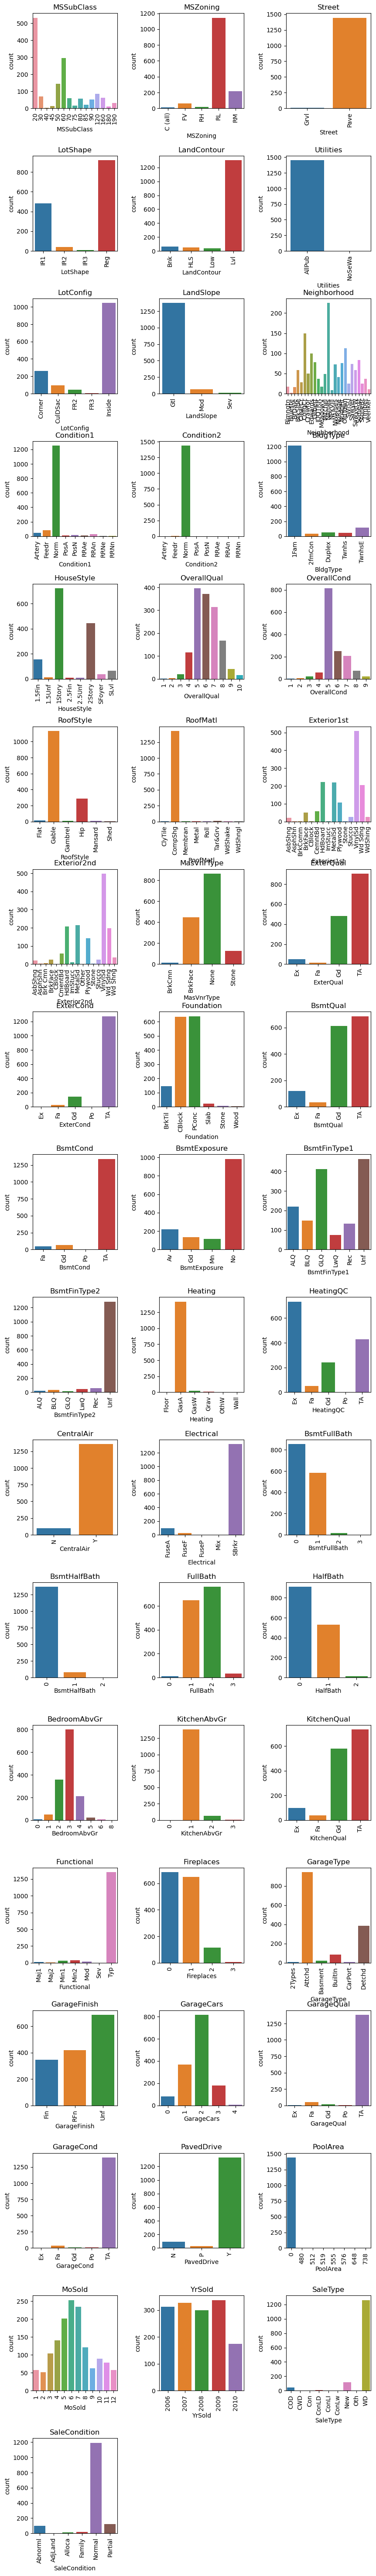

In [21]:
plt.figure(figsize=(10, 75))
for i, col in enumerate(cat_cols):
    plt.subplot(18, 3, i+1)
    plt.title(col)
    plt.xticks(rotation=90)
    sns.countplot(x=col, data=df)
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

In [22]:
cat_low_var_cols = ['MSSubClass', 'ExterCond', 'Street', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'SaleType', 'SaleCondition']

**Drop columns with low variance**

In [23]:
low_var_cols = num_low_var_cols + cat_low_var_cols
df.drop(low_var_cols, axis=1, inplace=True)

### 5. Handle Outliers

- **Numerical columns**

In [24]:
num_cols = df.select_dtypes("number").columns.tolist()
cat_cols = df.select_dtypes("category").columns.tolist()

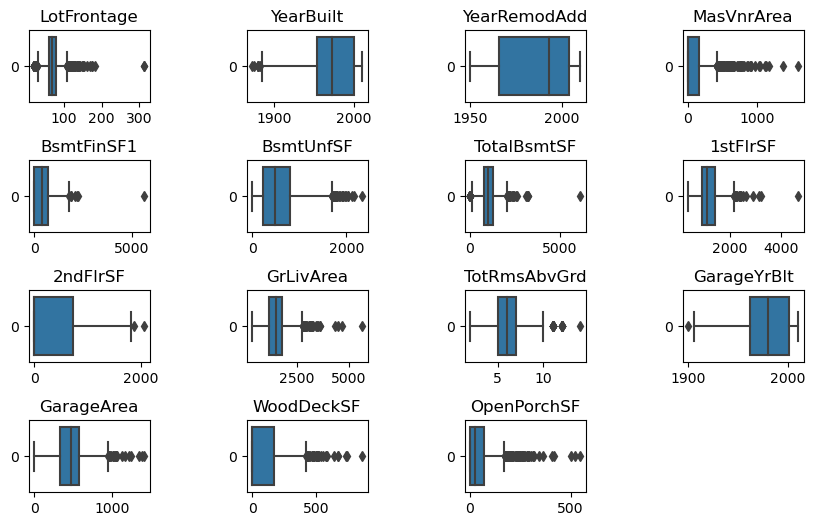

In [25]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(num_cols[:-1]):
    plt.subplot(4, 4, i+1)
    plt.title(col)
    sns.boxplot(df[col], orient="h")
plt.subplots_adjust(wspace=.8, hspace=.8)
plt.show()

In [26]:
for col in num_cols[:-1]:
    Q1 = np.quantile(df[col], .25)
    Q3 = np.quantile(df[col], .75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    upper_outliers = df[df[col] > upper][col].values
    lower_outliers = df[df[col] < lower][col].values    
    df[col].replace(upper_outliers, upper, inplace=True)
    df[col].replace(lower_outliers, lower, inplace=True)

- **Categorical columns**
    - replace the outlier categories (which are categories that rarely occur) with the mode.

In [27]:
for col in cat_cols:
    mode = df[col].mode()[0]
    vc = df[col].value_counts()

    categories = vc.index.to_numpy()
    counts = vc.values

    outliers = categories[counts <= 10]

    df[col].replace(outliers, mode, inplace=True)

### 6. Data Splitting

In [28]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, :-1], df.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, shuffle=True, random_state=42)

### 7. Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
# cols_to_encode = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
cols_to_encode = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish']
pd.DataFrame(df[cols_to_encode].nunique()).T

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish
0,4,3,4,4,23,7,4,10,10,4,4,4,4,4,6,4,4,4,3


In [34]:
for col in cols_to_encode:
    encoder = LabelEncoder()
    X_train[col] = encoder.fit_transform(X_train[col])
    X_val[col] = encoder.transform(X_val[col])
    X_test[col] = encoder.transform(X_test[col])

### 8. Normalization

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
X_scaler = MinMaxScaler()
num_cols = X_train.select_dtypes("number").columns 

X_train[num_cols] = X_scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = X_scaler.transform(X_val[num_cols])
X_test[num_cols] = X_scaler.transform(X_test[num_cols])

In [37]:
# y_scaler = MinMaxScaler()
# y_train[["SalePrice"]] = y_scaler.fit_transform(y_train[["SalePrice"]])

# Cartesian plane Between X & Y using TSNE

In [38]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=1)
X_tsne = tsne.fit_transform(X_train)

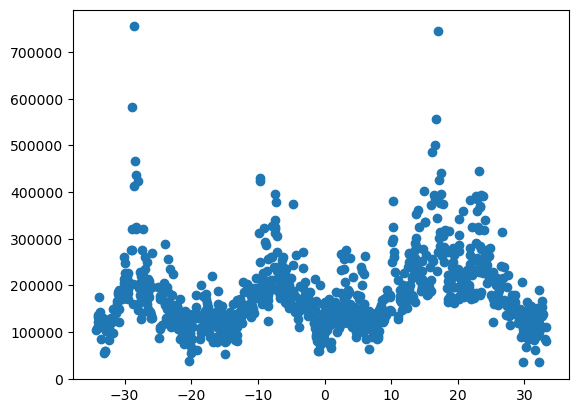

In [39]:
plt.scatter(X_tsne[:, 0], y_train["SalePrice"])
plt.show()

# Model

In [519]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [520]:
X_train.shape

(928, 44)

In [521]:
model = Sequential()
model.add(Dense(16, input_dim= 44, activation="sigmoid"))
model.add(Dense(16, activation="sigmoid"))
model.add(Dense(1))

In [522]:
model.compile(optimizer="sgd", loss="mean_squared_error", metrics="mean_absolute_error")

In [523]:
history = model.fit(X_train, y_train, 
                    validation_data=[X_val, y_val], 
                    verbose=True, epochs=100,
                    batch_size=128)

Epoch 1/100
8/8 [==============================] - 12s 805ms/step - loss: 24088948736.0000 - mean_absolute_error: 129618.3281 - val_loss: 13109132288.0000 - val_mean_absolute_error: 82426.8438
Epoch 2/100
8/8 [==============================] - 5s 744ms/step - loss: 8796129280.0000 - mean_absolute_error: 62938.3867 - val_loss: 8057099776.0000 - val_mean_absolute_error: 58737.6484
Epoch 3/100
8/8 [==============================] - 3s 415ms/step - loss: 6655858688.0000 - mean_absolute_error: 55644.0234 - val_loss: 7197704704.0000 - val_mean_absolute_error: 57432.5430
Epoch 4/100
8/8 [==============================] - 3s 447ms/step - loss: 6376168960.0000 - mean_absolute_error: 56147.1367 - val_loss: 6994707456.0000 - val_mean_absolute_error: 57811.7266
Epoch 5/100
8/8 [==============================] - 3s 362ms/step - loss: 6345931264.0000 - mean_absolute_error: 56860.0430 - val_loss: 6959301632.0000 - val_mean_absolute_error: 58028.1992
Epoch 6/100
8/8 [==============================] - 

8/8 [==============================] - 4s 542ms/step - loss: 6355260416.0000 - mean_absolute_error: 57608.5898 - val_loss: 6894936576.0000 - val_mean_absolute_error: 58864.3867
Epoch 88/100
8/8 [==============================] - 6s 907ms/step - loss: 6361138688.0000 - mean_absolute_error: 57952.9258 - val_loss: 6956496896.0000 - val_mean_absolute_error: 58047.4414
Epoch 89/100
8/8 [==============================] - 4s 542ms/step - loss: 6348598272.0000 - mean_absolute_error: 57301.9922 - val_loss: 7009042432.0000 - val_mean_absolute_error: 57744.3984
Epoch 90/100
8/8 [==============================] - 4s 619ms/step - loss: 6348056064.0000 - mean_absolute_error: 56866.5664 - val_loss: 6970263040.0000 - val_mean_absolute_error: 57955.7422
Epoch 91/100
8/8 [==============================] - 5s 735ms/step - loss: 6345227776.0000 - mean_absolute_error: 57391.0156 - val_loss: 7056769536.0000 - val_mean_absolute_error: 57584.6562
Epoch 92/100
8/8 [==============================] - 5s 659ms/st

# Model

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [76]:
model = Sequential()
model.add(Dense(8, input_dim=44, activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(1))

In [77]:
es = EarlyStopping(monitor='loss', patience=3)
model.compile(optimizer='sgd', 
              loss="mean_squared_error",
              metrics=["mean_absolute_error"])

In [78]:
ep = 100
history = model.fit(X_train, y_train, 
                    validation_data=[X_val, y_val], 
                    epochs=ep,
                    callbacks=[es])

Epoch 1/100
29/29 [==============================] - 1s 19ms/step - loss: 10851803136.0000 - mean_absolute_error: 73642.4375 - val_loss: 6961981952.0000 - val_mean_absolute_error: 58010.0898
Epoch 2/100
29/29 [==============================] - 0s 7ms/step - loss: 6386806272.0000 - mean_absolute_error: 57363.3672 - val_loss: 6927254016.0000 - val_mean_absolute_error: 58333.1641
Epoch 3/100
29/29 [==============================] - 0s 8ms/step - loss: 6361544704.0000 - mean_absolute_error: 57370.1484 - val_loss: 6982659584.0000 - val_mean_absolute_error: 57878.3789
Epoch 4/100
29/29 [==============================] - 0s 6ms/step - loss: 6354170368.0000 - mean_absolute_error: 57055.0273 - val_loss: 6899768320.0000 - val_mean_absolute_error: 58766.4219
Epoch 5/100
29/29 [==============================] - 0s 6ms/step - loss: 6368655872.0000 - mean_absolute_error: 57463.6914 - val_loss: 6991931904.0000 - val_mean_absolute_error: 57826.6133
Epoch 6/100
29/29 [==============================] - 

In [79]:
h = history.history
tr_err, val_err = h["mean_absolute_error"], h["val_mean_absolute_error"]

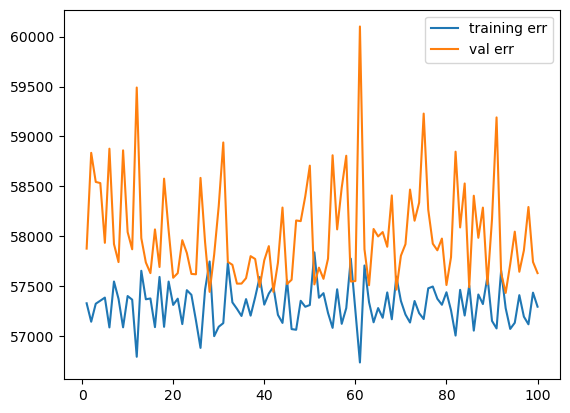

In [73]:
epochs = range(1, ep+1)
plt.plot(epochs, tr_err)
plt.plot(epochs, val_err)
plt.legend(["training err", "val err"])
plt.show()